# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [118]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

random_forest = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=3)
)

In [16]:
# CV attempt
scores_random_forest = cross_val_score(random_forest, data, target, scoring="neg_mean_absolute_error")

print(f"Random forest regressor: "
      f"{scores_random_forest.mean():.3f} +/- "
      f"{scores_random_forest.std():.3f}")

Random forest regressor: -330.020 +/- 21.482


In [119]:
random_forest.fit(data_train, target_train)
forest_predict = random_forest.predict(data_test)
forest_error = mean_absolute_error(target_test, forest_predict)
forest_error

366.04746997188863

In [98]:
random_forest['randomforestregressor'].estimators_

[DecisionTreeRegressor(max_features='auto', random_state=44833608),
 DecisionTreeRegressor(max_features='auto', random_state=694296638),
 DecisionTreeRegressor(max_features='auto', random_state=632772303)]

The next steps of this exercise are to:

- create a new dataset containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a scatter plot;
- plot the decision of each individual tree by predicting on the newly
  created dataset;
- plot the decision of the random forest using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [72]:
sorted(list(penguins['Flipper Length (mm)'].values))

[172.0,
 174.0,
 176.0,
 178.0,
 178.0,
 178.0,
 178.0,
 179.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 181.0,
 181.0,
 181.0,
 181.0,
 181.0,
 181.0,
 181.0,
 182.0,
 182.0,
 182.0,
 183.0,
 183.0,
 184.0,
 184.0,
 184.0,
 184.0,
 184.0,
 184.0,
 184.0,
 185.0,
 185.0,
 185.0,
 185.0,
 185.0,
 185.0,
 185.0,
 185.0,
 185.0,
 186.0,
 186.0,
 186.0,
 186.0,
 186.0,
 186.0,
 186.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 187.0,
 188.0,
 188.0,
 188.0,
 188.0,
 188.0,
 188.0,
 189.0,
 189.0,
 189.0,
 189.0,
 189.0,
 189.0,
 189.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 190.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 191.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 192.0,
 193.0,
 193.0,
 193.0,
 193.0,
 193.0,
 193.0,


In [109]:
penguins['Flipper Length (mm)']

0      172.0
1      174.0
2      176.0
3      178.0
4      178.0
       ...  
337    230.0
338    230.0
339    230.0
340    230.0
341    231.0
Name: Flipper Length (mm), Length: 342, dtype: float64

In [123]:
penguins2 = penguins[:341]
penguins2

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0
...,...,...
336,195.0,3650.0
337,207.0,4000.0
338,202.0,3400.0
339,193.0,3775.0


In [120]:
# penguins2 = penguins

In [124]:
data2, target2 = penguins2[[feature_name]], penguins2[target_name]
data_train2, data_test2, target_train2, target_test2 = train_test_split(
    data2, target2, random_state=0)

In [127]:
categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

random_forest2 = make_pipeline(
    preprocessor,
    RandomForestRegressor(n_estimators=3)
)

random_forest2.fit(data_train2, target_train2)
forest_predict2 = random_forest2.predict(data_test2)
forest_error2 = mean_absolute_error(target_test2, forest_predict2)
forest_error2

335.8875604053443

In [135]:
forest_predict2

array([3669.64285714, 3550.        , 3543.91025641, 3669.64285714,
       4679.72222222, 3495.04662005, 4337.5       , 3669.64285714,
       4414.58333333, 3974.31818182, 5772.91666667, 3694.43627451,
       3954.16666667, 3425.37037037, 5570.        , 3669.64285714,
       3536.80555556, 3543.91025641, 5570.        , 4364.56876457,
       5089.16666667, 3680.        , 4876.11111111, 3408.33333333,
       3748.01587302, 3954.16666667, 4626.30952381, 3495.04662005,
       4364.56876457, 5121.42857143, 3543.91025641, 3416.18055556,
       3433.33333333, 3680.        , 5011.11111111, 5950.        ,
       3965.55555556, 3694.43627451, 5089.16666667, 3694.43627451,
       4933.33333333, 3893.27651515, 4125.        , 5653.33333333,
       3495.04662005, 4125.        , 3597.5       , 3669.64285714,
       3954.16666667, 3965.55555556, 3408.33333333, 3495.04662005,
       3597.5       , 5528.57142857, 5772.91666667, 3536.80555556,
       3549.07407407, 3669.64285714, 3669.64285714, 3433.33333

In [129]:
random_forest2['randomforestregressor'].estimators_

[DecisionTreeRegressor(max_features='auto', random_state=259166243),
 DecisionTreeRegressor(max_features='auto', random_state=2007740171),
 DecisionTreeRegressor(max_features='auto', random_state=1255297771)]

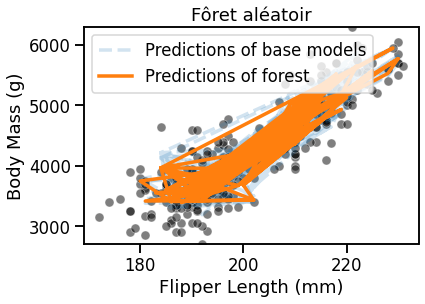

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, regressor in enumerate(random_forest2['randomforestregressor'].estimators_):
    # we convert `data_test` into a NumPy array to avoid a warning raised in scikit-learn
    regressor_predictions = regressor.predict(data_test2.to_numpy())
    base_model_line = plt.plot(
        data_test2["Flipper Length (mm)"], regressor_predictions, linestyle="--", alpha=0.2,
        label="Predictions of base models" if i == 0 else None,
        color="tab:blue"
    )

sns.scatterplot(x=data_train2["Flipper Length (mm)"], y=target_train2, color="black",
                alpha=0.5)
bagging_predictions = random_forest2.predict(data_test2)
plt.plot(data_test2["Flipper Length (mm)"], bagging_predictions,
         color="tab:orange", label="Predictions of forest")
plt.ylim(target_train2.min(), target_train2.max())
plt.legend()
_ = plt.title("Fôret aléatoir")

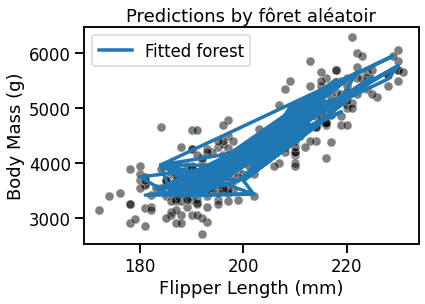

In [132]:
sns.scatterplot(x=data_train2["Flipper Length (mm)"], y=target_train2, color="black",
                alpha=0.5)
plt.plot(data_test2["Flipper Length (mm)"], forest_predict2, label="Fitted forest")
plt.legend()
_ = plt.title("Predictions by fôret aléatoir")

In [138]:
# Solution


import numpy as np

data_range = pd.DataFrame(np.linspace(170, 235, num=300),
                          columns=data.columns)
tree_predictions = []
for tree in random_forest['randomforestregressor'].estimators_:
    # we convert `data_range` into a NumPy array to avoid a warning raised in scikit-learn
    tree_predictions.append(tree.predict(data_range.to_numpy()))

forest_predictions = random_forest.predict(data_range)

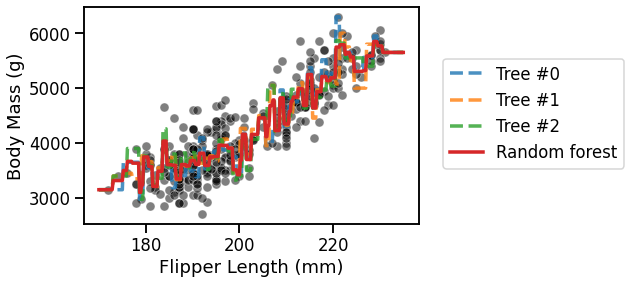

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)

# plot tree predictions
for tree_idx, predictions in enumerate(tree_predictions):
    plt.plot(data_range[feature_name], predictions, label=f"Tree #{tree_idx}",
             linestyle="--", alpha=0.8)

plt.plot(data_range[feature_name], forest_predictions, label=f"Random forest")
_ = plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")